# 쇼핑몰 지점별 매출액 예측 경진대회

## 라이브러리

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

## 경로 설정

In [2]:
import os
os.chdir('C:\\Users\\82107\\OneDrive\\바탕 화면\\동아리\\쇼핑몰 매출액 예측 경진대회\\dataset')
os.getcwd()

'C:\\Users\\82107\\OneDrive\\바탕 화면\\동아리\\쇼핑몰 매출액 예측 경진대회\\dataset'

## 데이터 불러오기

- 데이터 특징 살펴보기

In [3]:
df=pd.read_csv('train.csv')
df.head()

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales
0,1,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,8.106,False,1643690.90
1,2,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,8.106,True,1641957.44
2,3,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,8.106,False,1611968.17
3,4,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,8.106,False,1409727.59
4,5,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,8.106,False,1554806.68


In [4]:
df.tail()

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales
6250,6251,45,31/08/2012,75.09,3.867,23641.30,6.00,92.93,6988.31,3992.13,8.684,False,734297.87
6251,6252,45,07/09/2012,75.70,3.911,11024.45,12.80,52.63,1854.77,2055.70,8.684,True,766512.66
6252,6253,45,14/09/2012,67.87,3.948,11407.95,NaN,4.30,3421.72,5268.92,8.684,False,702238.27
6253,6254,45,21/09/2012,65.32,4.038,8452.20,92.28,63.24,2376.38,8670.40,8.684,False,723086.20
6254,6255,45,28/09/2012,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,8.684,False,713173.95


In [5]:
df.shape

(6255, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6255 entries, 0 to 6254
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            6255 non-null   int64  
 1   Store         6255 non-null   int64  
 2   Date          6255 non-null   object 
 3   Temperature   6255 non-null   float64
 4   Fuel_Price    6255 non-null   float64
 5   Promotion1    2102 non-null   float64
 6   Promotion2    1592 non-null   float64
 7   Promotion3    1885 non-null   float64
 8   Promotion4    1819 non-null   float64
 9   Promotion5    2115 non-null   float64
 10  Unemployment  6255 non-null   float64
 11  IsHoliday     6255 non-null   bool   
 12  Weekly_Sales  6255 non-null   float64
dtypes: bool(1), float64(9), int64(2), object(1)
memory usage: 592.6+ KB


In [7]:
df.isnull().sum()

id                 0
Store              0
Date               0
Temperature        0
Fuel_Price         0
Promotion1      4153
Promotion2      4663
Promotion3      4370
Promotion4      4436
Promotion5      4140
Unemployment       0
IsHoliday          0
Weekly_Sales       0
dtype: int64

In [8]:
df['Store'].value_counts() ## store 45개 있음 (한 스토어 당 139개의 데이터 존재)

1     139
24    139
26    139
27    139
28    139
29    139
30    139
31    139
32    139
33    139
34    139
35    139
36    139
37    139
38    139
39    139
40    139
41    139
42    139
43    139
44    139
25    139
23    139
2     139
22    139
3     139
4     139
5     139
6     139
7     139
8     139
9     139
10    139
11    139
12    139
13    139
14    139
15    139
16    139
17    139
18    139
19    139
20    139
21    139
45    139
Name: Store, dtype: int64

In [9]:
df1=df.copy()

In [10]:
df1

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales
0,1,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,8.106,False,1643690.90
1,2,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,8.106,True,1641957.44
2,3,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,8.106,False,1611968.17
3,4,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,8.106,False,1409727.59
4,5,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,8.106,False,1554806.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6250,6251,45,31/08/2012,75.09,3.867,23641.30,6.00,92.93,6988.31,3992.13,8.684,False,734297.87
6251,6252,45,07/09/2012,75.70,3.911,11024.45,12.80,52.63,1854.77,2055.70,8.684,True,766512.66
6252,6253,45,14/09/2012,67.87,3.948,11407.95,NaN,4.30,3421.72,5268.92,8.684,False,702238.27
6253,6254,45,21/09/2012,65.32,4.038,8452.20,92.28,63.24,2376.38,8670.40,8.684,False,723086.20


In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6255 entries, 0 to 6254
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            6255 non-null   int64  
 1   Store         6255 non-null   int64  
 2   Date          6255 non-null   object 
 3   Temperature   6255 non-null   float64
 4   Fuel_Price    6255 non-null   float64
 5   Promotion1    2102 non-null   float64
 6   Promotion2    1592 non-null   float64
 7   Promotion3    1885 non-null   float64
 8   Promotion4    1819 non-null   float64
 9   Promotion5    2115 non-null   float64
 10  Unemployment  6255 non-null   float64
 11  IsHoliday     6255 non-null   bool   
 12  Weekly_Sales  6255 non-null   float64
dtypes: bool(1), float64(9), int64(2), object(1)
memory usage: 592.6+ KB


In [12]:
df1[(df1['Store']==1)] ## 날짜는 2010/02/05 ~ 2012/09/28 까지 모든 스토어가 동일함

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales
0,1,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,8.106,False,1643690.90
1,2,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,8.106,True,1641957.44
2,3,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,8.106,False,1611968.17
3,4,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,8.106,False,1409727.59
4,5,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,8.106,False,1554806.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,135,1,31/08/2012,80.49,3.638,21442.73,102.32,21.70,13209.64,3032.96,6.908,False,1582083.40
135,136,1,07/09/2012,83.96,3.730,5204.68,35.74,50.94,4120.32,2737.17,6.908,True,1661767.33
136,137,1,14/09/2012,74.97,3.717,17212.52,7.00,18.79,1523.11,7992.72,6.908,False,1517428.87
137,138,1,21/09/2012,69.87,3.721,6352.30,7.64,4.69,1010.06,6456.71,6.908,False,1506126.06


In [13]:
df1[(df1['Store']==1)&(df1['IsHoliday']==1)][['Date']].count() ## 모두 다 공휴일 포함-> 공휴일은 총 10번 

Date    10
dtype: int64

In [14]:
## Promotion1~5 까지 모두 NaN인 값 찾기
df1[(df1['Store']==1)&(df1['Promotion1'].isnull())&(df1['Promotion2'].isnull())&(df1['Promotion3'].isnull())&(df1['Promotion4'].isnull())&(df1['Promotion5'].isnull())]
## 모든 store가 2011/11/04 까지 Promotion1~5 가 NaN 값
## Promotion1~5 가 모두 NaN인 값은 각각 4140개

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales
0,1,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,8.106,False,1643690.90
1,2,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,8.106,True,1641957.44
2,3,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,8.106,False,1611968.17
3,4,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,8.106,False,1409727.59
4,5,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,8.106,False,1554806.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,88,1,07/10/2011,69.31,3.285,NaN,NaN,NaN,NaN,NaN,7.866,False,1630989.95
88,89,1,14/10/2011,71.74,3.274,NaN,NaN,NaN,NaN,NaN,7.866,False,1493525.93
89,90,1,21/10/2011,63.71,3.353,NaN,NaN,NaN,NaN,NaN,7.866,False,1502562.78
90,91,1,28/10/2011,66.57,3.372,NaN,NaN,NaN,NaN,NaN,7.866,False,1445249.09


In [15]:
df1.isnull().sum()

id                 0
Store              0
Date               0
Temperature        0
Fuel_Price         0
Promotion1      4153
Promotion2      4663
Promotion3      4370
Promotion4      4436
Promotion5      4140
Unemployment       0
IsHoliday          0
Weekly_Sales       0
dtype: int64

## 시각화

- Promotion1

<AxesSubplot:xlabel='Promotion1'>

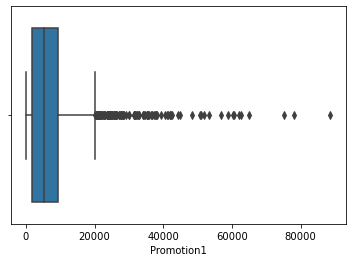

In [16]:
sns.boxplot(x='Promotion1', data=df1)

- Promotion2

<AxesSubplot:xlabel='Promotion2'>

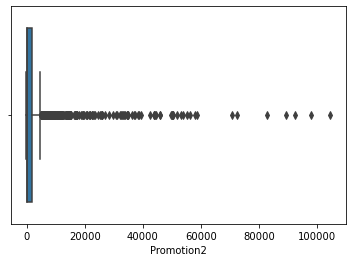

In [17]:
sns.boxplot(x='Promotion2', data=df1)

- Promotion3

<AxesSubplot:xlabel='Promotion3'>

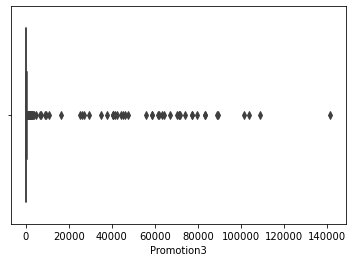

In [18]:
sns.boxplot(x='Promotion3', data=df1)

- Promotion4

<AxesSubplot:xlabel='Promotion4'>

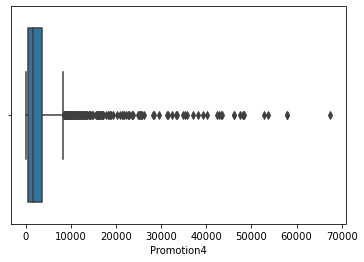

In [19]:
sns.boxplot(x='Promotion4', data=df1)

- Promotion5

<AxesSubplot:xlabel='Promotion5'>

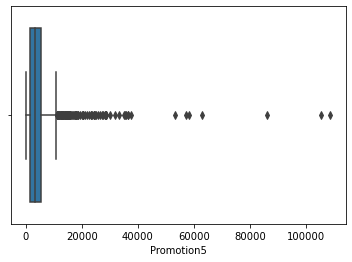

In [20]:
sns.boxplot(x='Promotion5', data=df1)

- IsHoliday

<AxesSubplot:xlabel='IsHoliday', ylabel='count'>

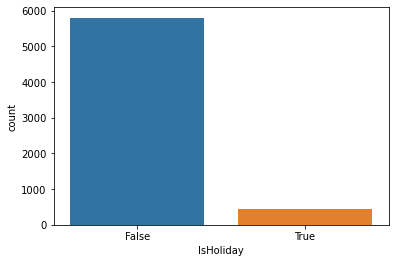

In [21]:
sns.countplot(x='IsHoliday', data=df1)

- Promotion과 Weekly_Sales scatter plot
- Weekly_Sales과 Promotion 관계 알아보기

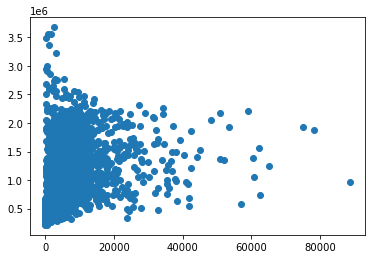

In [22]:
plt.scatter(x='Promotion1', y='Weekly_Sales', data=df1)
plt.show()

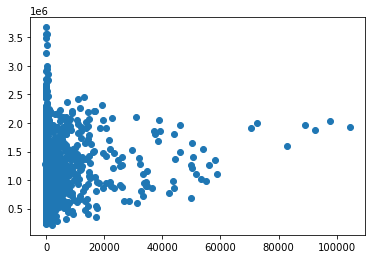

In [23]:
plt.scatter(x='Promotion2', y='Weekly_Sales', data=df1)
plt.show()

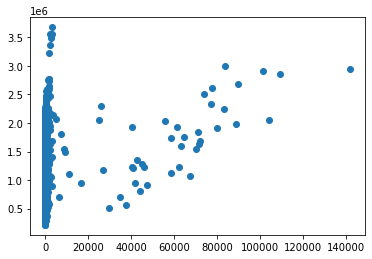

In [24]:
plt.scatter(x='Promotion3', y='Weekly_Sales', data=df1)
plt.show()

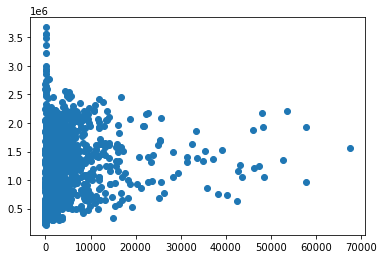

In [25]:
plt.scatter(x='Promotion4', y='Weekly_Sales', data=df1)
plt.show()

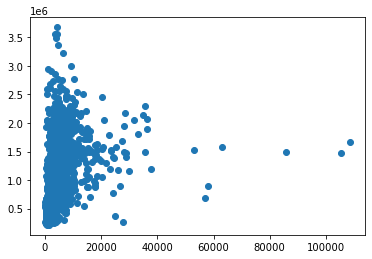

In [26]:
plt.scatter(x='Promotion5', y='Weekly_Sales', data=df1)
plt.show()

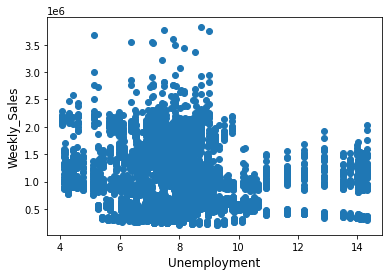

In [28]:
plt.scatter(x='Unemployment', y='Weekly_Sales', data=df1)
plt.xlabel('Unemployment', size=12)
plt.ylabel('Weekly_Sales', size=12)
plt.show()

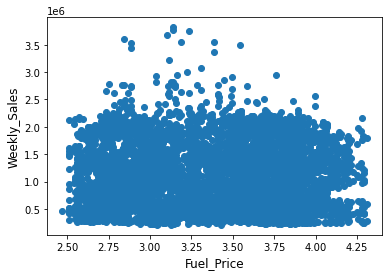

In [29]:
plt.scatter(x='Fuel_Price', y='Weekly_Sales', data=df1)
plt.xlabel('Fuel_Price', size=12)
plt.ylabel('Weekly_Sales', size=12)
plt.show()

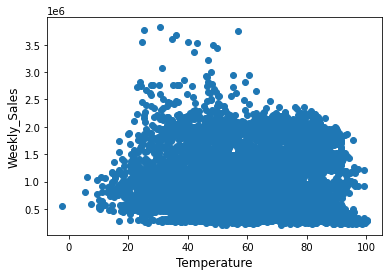

In [30]:
plt.scatter(x='Temperature', y='Weekly_Sales', data=df1)
plt.xlabel('Temperature', size=12)
plt.ylabel('Weekly_Sales', size=12)
plt.show()

In [31]:
df1.corr()

,id,Store,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales
id,1.000000e+00,9.997531e-01,-0.019554,0.075666,-0.157843,-0.042932,-0.039226,-0.015269,-0.051893,0.218548,1.475431e-16,-0.335276
Store,9.997531e-01,1.000000e+00,-0.022895,0.058628,-0.158183,-0.040512,-0.037557,-0.015109,-0.051439,0.223808,1.547191e-16,-0.335569
Temperature,-1.955428e-02,-2.289476e-02,1.000000,0.148054,-0.059489,-0.323549,-0.097627,-0.072568,-0.027799,0.102688,-1.555954e-01,-0.063231
Fuel_Price,7.566586e-02,5.862843e-02,0.148054,1.000000,0.087613,-0.214387,-0.095478,-0.028819,-0.116167,-0.025728,-7.148479e-02,0.010986
Promotion1,-1.578430e-01,-1.581835e-01,-0.059489,0.087613,1.000000,0.028262,-0.108023,0.820015,0.173296,0.030090,-4.375904e-02,0.317564
Promotion2,-4.293211e-02,-4.051200e-02,-0.323549,-0.214387,0.028262,1.000000,-0.049666,-0.009585,-0.006747,0.017877,3.264987e-01,0.094407
Promotion3,-3.922622e-02,-3.755728e-02,-0.097627,-0.095478,-0.108023,-0.049666,1.000000,-0.073920,-0.024157,0.008663,4.162788e-01,0.199661
Promotion4,-1.526918e-02,-1.510892e-02,-0.072568,-0.028819,0.820015,-0.009585,-0.073920,1.000000,0.107567,0.017714,-9.818811e-03,0.162143
Promotion5,-5.189250e-02,-5.143911e-02,-0.027799,-0.116167,0.173296,-0.006747,-0.024157,0.107567,1.000000,-0.007787,-5.648109e-02,0.297707
Unemployment,2.185480e-01,2.238084e-01,0.102688,-0.025728,0.030090,0.017877,0.008663,0.017714,-0.007787,1.000000,6.666948e-03,-0.107331


<AxesSubplot:>

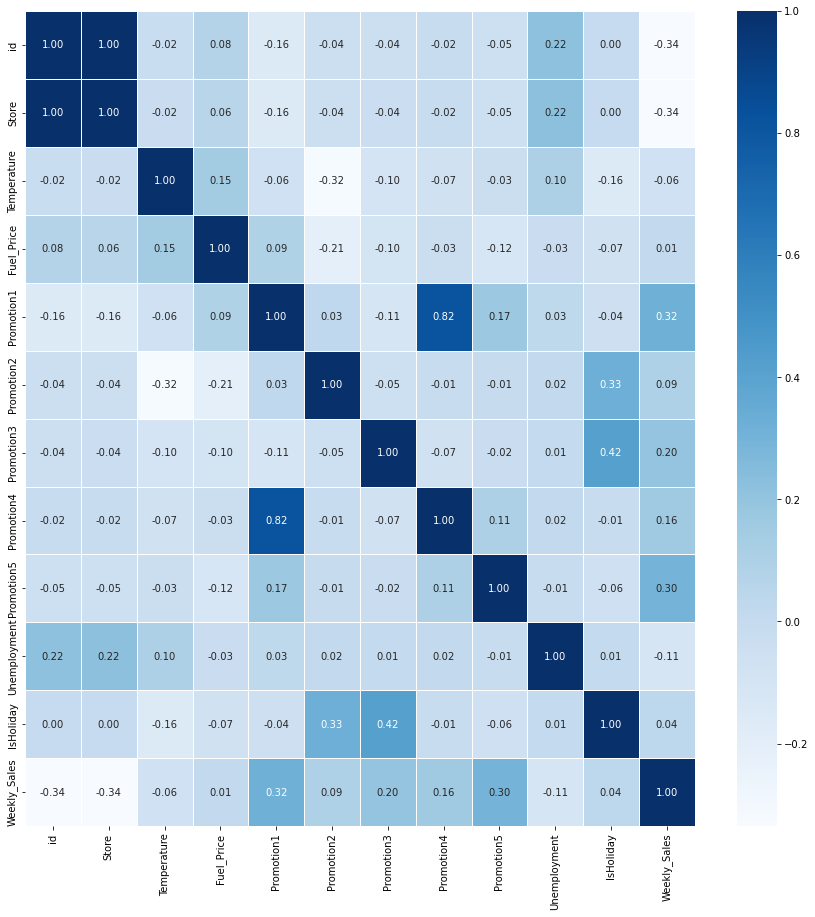

In [32]:
plt.figure(figsize=(15,15))
sns.heatmap(data = df1.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

## 결측치 처리

- 0으로 결측치 대체하기

In [33]:
df1['Promotion1']=df1['Promotion1'].fillna(0)

In [34]:
df1['Promotion2']=df1['Promotion2'].fillna(0)

In [35]:
df1['Promotion3']=df1['Promotion3'].fillna(0)

In [36]:
df1['Promotion4']=df1['Promotion4'].fillna(0)

In [37]:
df1['Promotion5']=df1['Promotion5'].fillna(0)

In [38]:
df1['Promotion_sum']=df1['Promotion1']+df1['Promotion2']+df1['Promotion3']+df1['Promotion4']+df1['Promotion5']

In [39]:
df1['Promotion_mean']=(df1['Promotion1']+df1['Promotion2']+df1['Promotion3']+df1['Promotion4']+df1['Promotion5'])/5

In [40]:
df1=df1.drop(['Promotion1','Promotion2','Promotion3','Promotion4','Promotion4','Promotion5'], axis=1)

In [41]:
df1

,id,Store,Date,Temperature,Fuel_Price,Unemployment,IsHoliday,Weekly_Sales,Promotion_sum,Promotion_mean
0,1,1,05/02/2010,42.31,2.572,8.106,False,1643690.90,0.00,0.000
1,2,1,12/02/2010,38.51,2.548,8.106,True,1641957.44,0.00,0.000
2,3,1,19/02/2010,39.93,2.514,8.106,False,1611968.17,0.00,0.000
3,4,1,26/02/2010,46.63,2.561,8.106,False,1409727.59,0.00,0.000
4,5,1,05/03/2010,46.50,2.625,8.106,False,1554806.68,0.00,0.000
...,...,...,...,...,...,...,...,...,...,...
6250,6251,45,31/08/2012,75.09,3.867,8.684,False,734297.87,34720.67,6944.134
6251,6252,45,07/09/2012,75.70,3.911,8.684,True,766512.66,15000.35,3000.070
6252,6253,45,14/09/2012,67.87,3.948,8.684,False,702238.27,20102.89,4020.578
6253,6254,45,21/09/2012,65.32,4.038,8.684,False,723086.20,19654.50,3930.900


## 이상치 처리

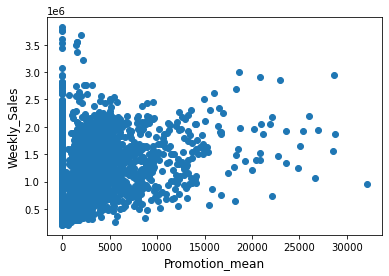

In [44]:
plt.scatter(x='Promotion_mean', y='Weekly_Sales', data=df1)
plt.xlabel('Promotion_mean', size=12)
plt.ylabel('Weekly_Sales', size=12)
plt.show()

In [45]:
df1=df1[df1['Promotion_mean']<30000]
df1

,id,Store,Date,Temperature,Fuel_Price,Unemployment,IsHoliday,Weekly_Sales,Promotion_sum,Promotion_mean
0,1,1,05/02/2010,42.31,2.572,8.106,False,1643690.90,0.00,0.000
1,2,1,12/02/2010,38.51,2.548,8.106,True,1641957.44,0.00,0.000
2,3,1,19/02/2010,39.93,2.514,8.106,False,1611968.17,0.00,0.000
3,4,1,26/02/2010,46.63,2.561,8.106,False,1409727.59,0.00,0.000
4,5,1,05/03/2010,46.50,2.625,8.106,False,1554806.68,0.00,0.000
...,...,...,...,...,...,...,...,...,...,...
6250,6251,45,31/08/2012,75.09,3.867,8.684,False,734297.87,34720.67,6944.134
6251,6252,45,07/09/2012,75.70,3.911,8.684,True,766512.66,15000.35,3000.070
6252,6253,45,14/09/2012,67.87,3.948,8.684,False,702238.27,20102.89,4020.578
6253,6254,45,21/09/2012,65.32,4.038,8.684,False,723086.20,19654.50,3930.900


In [117]:
## Promotion_mean과 Promotion_sum을 만든 후 모델을 돌리고 변수 중요도 plot을 그림
## Promotion_mean이 Promotion_sum 보다 변수 중요도가 높아서 Promotion_mean 사용

In [46]:
df2=df1.copy()

In [48]:
df2=df2.drop(['Promotion_sum'], axis=1)

## 날짜 분리하기

In [75]:
def yy(df1):
    return df1.split('/')[2]
df1['year']=df1['Date'].apply(yy)

In [76]:
def mm(df1):
    return df1.split('/')[1]
df1['month']=df1['Date'].apply(mm)

In [77]:
def dd(test):
    return test.split('/')[0]
test['day']=test['Date'].apply(dd)

In [78]:
df1=df1.drop('Date', axis=1)

In [79]:
df1['year']=pd.to_numeric(df1['year'])
df1['month']=pd.to_numeric(df1['month'])
df1['day']=pd.to_numeric(df1['day'])

## 랜덤포레스트

In [191]:
#df2 = pd.get_dummies(df2, columns = ['Store'])

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [81]:
df1=df1.drop(['id'],axis=1)

In [82]:
x=df1.drop(['Weekly_Sales'], axis=1)
y=df1['Weekly_Sales']
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.3)

In [83]:
x_train.shape, x_test.shape

((4378, 10), (1877, 10))

In [85]:
from sklearn.preprocessing import RobustScaler

scaler=RobustScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [86]:
from sklearn.model_selection import GridSearchCV
param_grid = [
    {'n_estimators': [3,10,30], 'max_features': [2,4,6,8]},
    {'bootstrap':[False], 'n_estimators':[3,10], 'max_features':[2,3,4]},
]

In [87]:
forest=RandomForestRegressor()

- GridSearch 적용

In [88]:
from sklearn.model_selection import KFold

kf = KFold(random_state=30,
           n_splits=10,
           shuffle=True,
          )

In [89]:
grid_search = GridSearchCV(forest, param_grid, cv = 5,
                          scoring='neg_mean_absolute_error',
                          return_train_score = True)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_absolute_error')

In [90]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [92]:
model=grid_search.best_estimator_  
model.predict(x_test)

array([ 524329.03666667,  869670.63766667, 1562153.149     , ...,
        542242.896     , 1667449.35833333, 1525944.01366667])

In [118]:
#from sklearn.metrics import mean_squared_error
#tree_mse=mean_squared_error(y_test, model)
#tree_rmse=np.sqrt(tree_mse)
#print(f'rmse:{tree_rmse}')

In [95]:
importances = model.feature_importances_

In [96]:
X_train = pd.DataFrame(x_train, columns = x.columns)

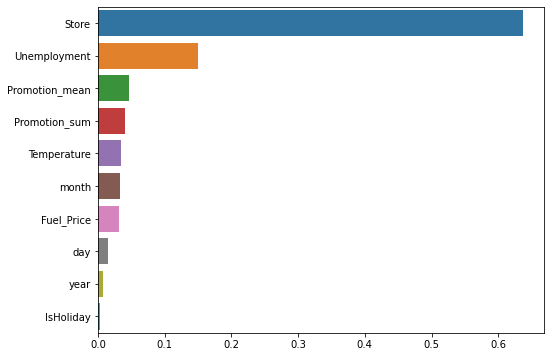

In [97]:
import matplotlib.pyplot as plt # 득점모델 변수 중요도
import seaborn as sns
%matplotlib inline
 
ftr_importances_values = grid_search.best_estimator_.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top = ftr_importances.sort_values(ascending=False)[:20]
 
plt.figure(figsize=(8, 6))
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.show()

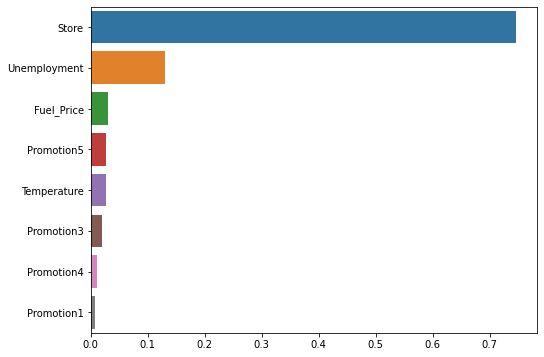

In [40]:
#import matplotlib.pyplot as plt # 득점모델 변수 중요도
#import seaborn as sns
#%matplotlib inline
 
#ftr_importances_values = forest.feature_importances_
#ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
#ftr_top = ftr_importances.sort_values(ascending=False)[:20]
 
#plt.figure(figsize=(8, 6))
#sns.barplot(x=ftr_top, y=ftr_top.index)
#plt.show()

## 랜덤포레스트 Promotion_mean

In [119]:
df2=df2.drop(['id'],axis=1)

In [120]:
df2=df2.drop(['IsHoliday'], axis=1)

In [123]:
def yy(df2):
    return df2.split('/')[2]
df2['year']=df2['Date'].apply(yy)

In [124]:
def mm(df2):
    return df2.split('/')[1]
df2['month']=df2['Date'].apply(mm)

In [125]:
def dd(df2):
    return df2.split('/')[0]
df2['day']=df2['Date'].apply(dd)

In [126]:
df2=df2.drop(['Date'], axis=1)

In [132]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

x=df2.drop(['Weekly_Sales'], axis=1)
y=df2['Weekly_Sales']
x_train,x_test,y_train,y_test = train_test_split(x, y,test_size = 0.3)
model = RandomForestRegressor()
params = {'max_depth':[3, 4, 5, 6], 'min_samples_split':[2, 3, 4]}

grid_forest = GridSearchCV(model, param_grid = params,
                          cv = 5, refit = True, return_train_score = True)
grid_forest.fit(x_train, y_train)

# 결과표 출력
scores_df = pd.DataFrame(grid_forest.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', 
           'split0_test_score', 'split1_test_score', 'split2_test_score']]

# best_params_ 할당
print(f"최적의 파라미터 : {grid_forest.best_params_}")
print(f"최적의 파라미터로 모델의 정확도 : {grid_forest.best_score_}")

# 최적의 best_params
estimator = grid_forest.best_estimator_
y_pred = estimator.predict(x_test)

최적의 파라미터 : {'max_depth': 6, 'min_samples_split': 4}
최적의 파라미터로 모델의 정확도 : 0.73200626239484


## Test set

In [133]:
test=pd.read_csv('test.csv')

In [134]:
test

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday
0,1,1,05/10/2012,68.55,3.617,8077.89,NaN,18.22,3617.43,3626.14,6.573,False
1,2,1,12/10/2012,62.99,3.601,2086.18,NaN,8.11,602.36,5926.45,6.573,False
2,3,1,19/10/2012,67.97,3.594,950.33,NaN,4.93,80.25,2312.85,6.573,False
3,4,1,26/10/2012,69.16,3.506,2585.85,31.75,6.00,1057.16,1305.01,6.573,False
4,5,2,05/10/2012,70.27,3.617,6037.76,NaN,10.04,3027.37,3853.40,6.170,False
...,...,...,...,...,...,...,...,...,...,...,...,...
175,176,44,26/10/2012,46.97,3.755,38.65,2.61,0.98,NaN,457.74,5.217,False
176,177,45,05/10/2012,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,8.667,False
177,178,45,12/10/2012,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,8.667,False
178,179,45,19/10/2012,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,8.667,False


In [135]:
def yy(test):
    return test.split('/')[2]
test['year']=test['Date'].apply(yy)

In [136]:
def mm(test):
    return test.split('/')[1]
test['month']=test['Date'].apply(mm)

In [137]:
def dd(test):
    return test.split('/')[0]
test['day']=test['Date'].apply(dd)

In [138]:
test['year']=pd.to_numeric(test['year'])
test['month']=pd.to_numeric(test['month'])
test['day']=pd.to_numeric(test['day'])

In [139]:
test['Promotion1']=test['Promotion1'].fillna(0)
test['Promotion2']=test['Promotion2'].fillna(0)
test['Promotion3']=test['Promotion3'].fillna(0)
test['Promotion4']=test['Promotion4'].fillna(0)
test['Promotion5']=test['Promotion5'].fillna(0)

In [140]:
test['Promotion_mean']=(test['Promotion1']+test['Promotion2']+test['Promotion3']+test['Promotion4']+test['Promotion5'])

In [141]:
test=test.drop(['Promotion1','Promotion2','Promotion3','Promotion4','Promotion4','Promotion5'], axis=1)

In [142]:
test=test.drop(['id','IsHoliday'], axis=1)

In [146]:
test=test.drop(['Date'], axis=1)

In [147]:
test

,Store,Temperature,Fuel_Price,Unemployment,year,month,day,Promotion_mean
0,1,68.55,3.617,6.573,2012,10,5,15339.68
1,1,62.99,3.601,6.573,2012,10,12,8623.10
2,1,67.97,3.594,6.573,2012,10,19,3348.36
3,1,69.16,3.506,6.573,2012,10,26,4985.77
4,2,70.27,3.617,6.170,2012,10,5,12928.57
...,...,...,...,...,...,...,...,...
175,44,46.97,3.755,5.217,2012,10,26,499.98
176,45,64.89,3.985,8.667,2012,10,5,9659.00
177,45,54.47,4.000,8.667,2012,10,12,6554.03
178,45,56.47,3.969,8.667,2012,10,19,3982.42


In [148]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Store           180 non-null    int64  
 1   Temperature     180 non-null    float64
 2   Fuel_Price      180 non-null    float64
 3   Unemployment    180 non-null    float64
 4   year            180 non-null    int64  
 5   month           180 non-null    int64  
 6   day             180 non-null    int64  
 7   Promotion_mean  180 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 11.4 KB


In [149]:
prediction=estimator.predict(test)
print('----------------------예측된 데이터의 상위 10개의 값 확인--------------------\n')
print(prediction[:10])

----------------------예측된 데이터의 상위 10개의 값 확인--------------------

[1212380.1533185  1437905.34738475 1437905.34738475 1437093.98470475
 1352318.17721436 1588975.61968625 1588975.61968625 1588164.25700625
  908050.82288131  970461.70654602]


In [150]:
sample_submission=pd.read_csv('sample_submission.csv')

In [151]:
sample_submission['Weekly_Sales']=prediction
sample_submission.head()

,id,Weekly_Sales
0,1,1.212380e+06
1,2,1.437905e+06
2,3,1.437905e+06
3,4,1.437094e+06
4,5,1.352318e+06


In [152]:
sample_submission

,id,Weekly_Sales
0,1,1.212380e+06
1,2,1.437905e+06
2,3,1.437905e+06
3,4,1.437094e+06
4,5,1.352318e+06
...,...,...
175,176,9.112672e+05
176,177,7.973756e+05
177,178,8.402186e+05
178,179,8.402186e+05


In [153]:
sample_submission.to_csv('submission4.csv', index=False)